# **Neural Networks: Classification & Regression**

#### Keras: Deep Learning & Neural Networks - Notebook #1

Content:
- Regression with Keras
- Classification with Keras




**Import Libraries**

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# -------------- KERAS --------------
import keras
from keras.models import Sequential
from keras.layers import Dense

##**Regression**

**Data**

In [10]:
data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
X, y = data[data.columns[data.columns != 'Strength']], data['Strength']

# ---- normalize input data ----
X = (X - X.mean()) / X.std() 

# ---- train-test split -----
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Build Model**

In [7]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_shape = (X.shape[1],)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1))

# ----- compile model -----
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# ----- model summary -----
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                450       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,051
Trainable params: 3,051
Non-trainable params: 0
_________________________________________________________________


**Train & Test Model**

In [13]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 2)
predictions = model.predict(X_test)

Epoch 1/100
17/17 - 0s - loss: 13.2716 - val_loss: 29.6625 - 97ms/epoch - 6ms/step
Epoch 2/100
17/17 - 0s - loss: 13.4442 - val_loss: 29.3359 - 58ms/epoch - 3ms/step
Epoch 3/100
17/17 - 0s - loss: 13.4123 - val_loss: 29.4400 - 56ms/epoch - 3ms/step
Epoch 4/100
17/17 - 0s - loss: 13.4265 - val_loss: 29.8872 - 83ms/epoch - 5ms/step
Epoch 5/100
17/17 - 0s - loss: 13.4501 - val_loss: 29.2308 - 65ms/epoch - 4ms/step
Epoch 6/100
17/17 - 0s - loss: 13.4821 - val_loss: 29.9400 - 77ms/epoch - 5ms/step
Epoch 7/100
17/17 - 0s - loss: 13.4932 - val_loss: 29.5830 - 70ms/epoch - 4ms/step
Epoch 8/100
17/17 - 0s - loss: 13.4764 - val_loss: 29.3132 - 59ms/epoch - 3ms/step
Epoch 9/100
17/17 - 0s - loss: 13.3091 - val_loss: 29.4542 - 59ms/epoch - 3ms/step
Epoch 10/100
17/17 - 0s - loss: 13.3899 - val_loss: 29.8754 - 63ms/epoch - 4ms/step
Epoch 11/100
17/17 - 0s - loss: 12.9982 - val_loss: 29.0448 - 80ms/epoch - 5ms/step
Epoch 12/100
17/17 - 0s - loss: 12.9737 - val_loss: 29.5800 - 60ms/epoch - 4ms/step
E

**Results Visualizations**

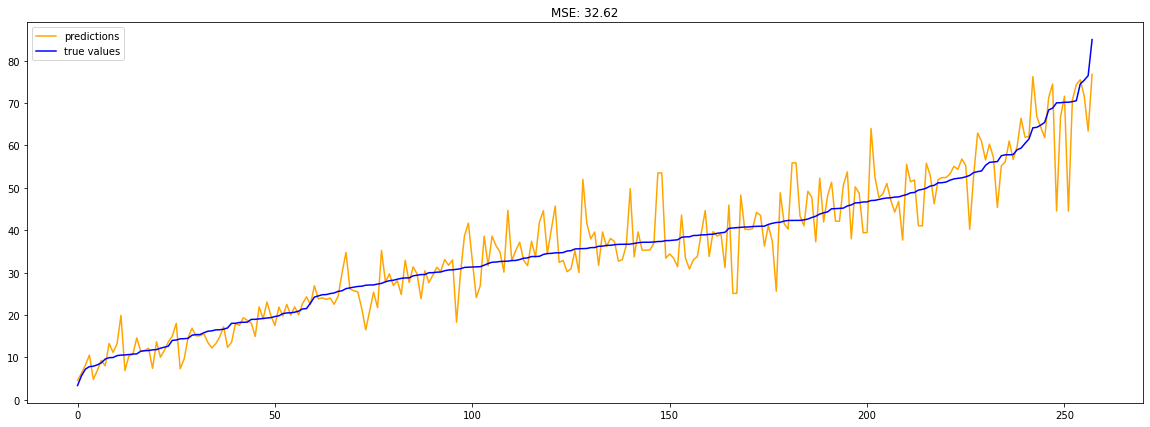

In [26]:
from sklearn.metrics import mean_squared_error

# organize and sort data to visualize
results = pd.DataFrame({'predictions': list(predictions),'true': list(y_test)})
results = results.sort_values(by = 'predictions')
results.reset_index(drop = True, inplace = True)

plt.figure(figsize=(20, 7))
plt.plot(results.index, results['true'], color = 'orange', label = 'True')
plt.plot(results.index, results['predictions'], color = 'blue', label = 'Predictions')
plt.legend(['predictions', 'true values'])
plt.title("MSE: " + str(round(mean_squared_error(y_test, predictions), 2)))
plt.show()

##**Classification**
**Data**

Keras has a built in dataset we can use for classification of images, let's see the first image in the training dataset

The ***mnist*** dataset is a dataset of handwritten digits, 0 to 9.

11490434/11490434 [==============================] - 0s 0us/step


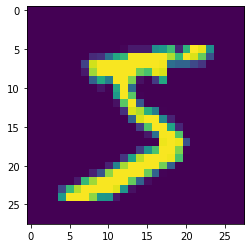

In [27]:
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0])

**Data Processing**
- Flatten data to 1-D vector
- Normalize data
- One-Hot encoding

In [29]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float')

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Model**

In [31]:
model = Sequential()
model.add(Dense(num_pixels, activation = 'relu', input_shape = (num_pixels,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(y_test.shape[1], activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 784)               615440    
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________


**Train Model**

In [32]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, verbose = 2)

Epoch 1/10
1875/1875 - 20s - loss: 0.1862 - accuracy: 0.9443 - val_loss: 0.1111 - val_accuracy: 0.9668 - 20s/epoch - 11ms/step
Epoch 2/10
1875/1875 - 22s - loss: 0.0792 - accuracy: 0.9754 - val_loss: 0.0881 - val_accuracy: 0.9725 - 22s/epoch - 12ms/step
Epoch 3/10
1875/1875 - 18s - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0696 - val_accuracy: 0.9798 - 18s/epoch - 10ms/step
Epoch 4/10
1875/1875 - 16s - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0746 - val_accuracy: 0.9775 - 16s/epoch - 8ms/step
Epoch 5/10
1875/1875 - 20s - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0714 - val_accuracy: 0.9810 - 20s/epoch - 11ms/step
Epoch 6/10
1875/1875 - 24s - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0744 - val_accuracy: 0.9810 - 24s/epoch - 13ms/step
Epoch 7/10
1875/1875 - 16s - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.0720 - val_accuracy: 0.9827 - 16s/epoch - 8ms/step
Epoch 8/10
1875/1875 - 18s - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0768 - val_accuracy: 0.9810 - 18s/epoc

**Model Evaluation**

In [37]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("ACCURACY:\t", round(scores[1], 2), "\nERROR:\t\t", round(1 - scores[1], 2))

ACCURACY:	 0.98 
ERROR:		 0.02


##**Model Transfer Learning**

Model Transfer Learning is the ability to save the model after it has been trained, to be used again or train it further again later in the futrue.

**Save Model**

In [ ]:
model.save('mnist_classification.h5') #.h5 is the typical extension to save a model

**Reload Model** that has been saved before

In [ ]:
from keras.models import load_model
pretrained_model = load_model('mnist_classification.h5')